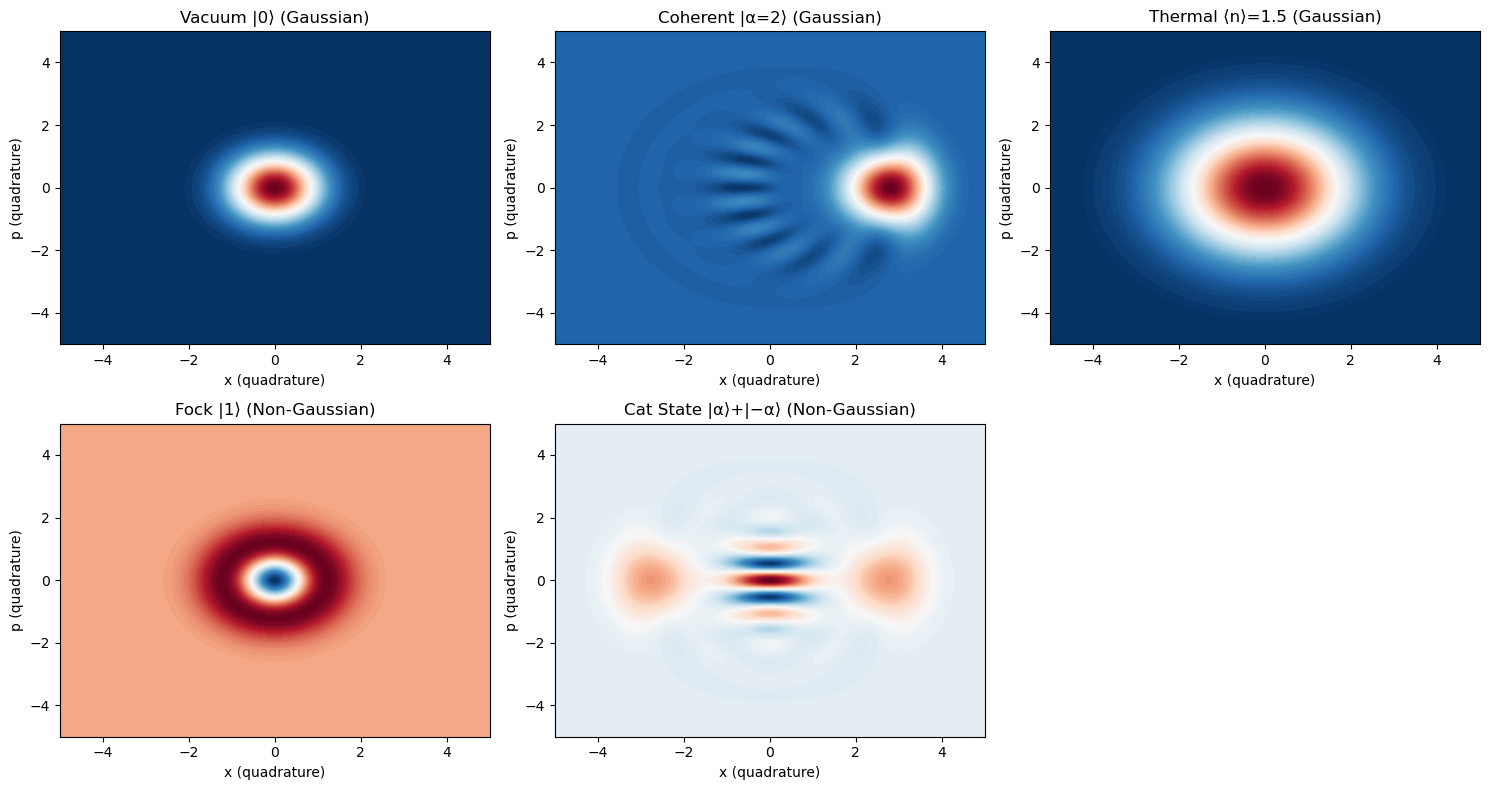

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, coherent, thermal_dm, fock, wigner, Qobj

# Define phase space grid
xvec = np.linspace(-5, 5, 500)

# Quantum states to visualize
states = {
    "Vacuum |0⟩ (Gaussian)": basis(10, 0),
    "Coherent |α=2⟩ (Gaussian)": coherent(10, 2),
    "Thermal ⟨n⟩=1.5 (Gaussian)": thermal_dm(10, 1.5),
    "Fock |1⟩ (Non-Gaussian)": fock(10, 1),
    "Cat State |α⟩+|−α⟩ (Non-Gaussian)": (coherent(10, 2) + coherent(10, -2)).unit()
}

# Set up plots
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

# Plot each Wigner function
for i, (label, state) in enumerate(states.items()):
    if isinstance(state, Qobj) and state.isket:
        rho = state * state.dag()  # convert ket to density matrix
    else:
        rho = state
    W = wigner(rho, xvec, xvec)
    axs[i].contourf(xvec, xvec, W, 100, cmap='RdBu_r')
    axs[i].set_title(label)
    axs[i].set_xlabel('x (quadrature)')
    axs[i].set_ylabel('p (quadrature)')

# Hide unused subplot
axs[-1].axis('off')
plt.tight_layout()
plt.show()
